### Specifically, create two binomially distributed populations with n equal to 10 and size equal to 10000. The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. Using a sample size of 100, calculate the means and standard deviations of your samples.

#### For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen. Discuss the results with your mentor.


In [2]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline

pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10, 0.5, 10000) 

# Let’s make histograms for the two groups. 

#plt.hist(pop1, alpha=0.5, label='Population 1') 
#plt.hist(pop2, alpha=0.5, label='Population 2') 
#plt.legend(loc='upper right') 
#plt.show()

#### 1. Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

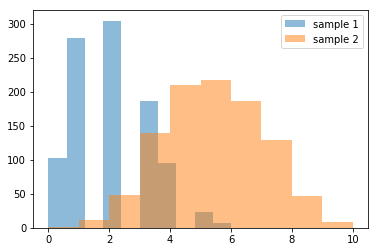

In [3]:
sample1_1000 = np.random.choice(pop1, 1000, replace=True)
sample2_1000 = np.random.choice(pop2, 1000, replace=True)

plt.hist(sample1_1000, alpha=0.5, label='sample 1') 
plt.hist(sample2_1000, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

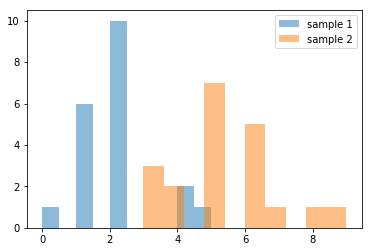

In [4]:
sample1_20 = np.random.choice(pop1, 20, replace=True)
sample2_20 = np.random.choice(pop2, 20, replace=True)

plt.hist(sample1_20, alpha=0.5, label='sample 1') 
plt.hist(sample2_20, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

I expect both mean and standard deviation to change more when decreasing the sample size, and can be greater or smaller. The smaller sample size will alternate between greater and lesser than the values of the larger sample size. The larger sample size values will stay more constant and consistently closer to the true values than the smaller sample.

In [5]:
print("Sample1 (100 samples) Mean: {}\nSample1 (100 samples) Standard Deviation: {}\n".format(np.mean(sample1_1000), np.std(sample1_1000)))
print("Sample2 (100 samples) Mean: {}\nSample2 (100 samples) Standard Deviation: {}\n".format(np.mean(sample2_1000), np.std(sample2_1000)))
print("Sample1 (20 samples) Mean: {}\nSample1 (20 samples) Standard Deviation: {}\n".format(np.mean(sample1_20), np.std(sample1_20)))
print("Sample2 (20 samples) Mean: {}\nSample2 (20 samples) Standard Deviation: {}".format(np.mean(sample2_20), np.std(sample2_20)))

Sample1 (100 samples) Mean: 1.988
Sample1 (100 samples) Standard Deviation: 1.2561273820755599

Sample2 (100 samples) Mean: 4.934
Sample2 (100 samples) Standard Deviation: 1.6375725938107295

Sample1 (20 samples) Mean: 1.95
Sample1 (20 samples) Standard Deviation: 1.16081867662439

Sample2 (20 samples) Mean: 5.3
Sample2 (20 samples) Standard Deviation: 1.5198684153570665


The mean and standard deviation indeed are further off from that of the population.

#### 2. Change the population value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value.


In [8]:
pop1 = np.random.binomial(10, 0.3, 10000)

sample1_1000 = np.random.choice(pop1, 1000, replace=True)

t_value1, p_value1 = ttest_ind(sample2_1000, sample1_1000, equal_var=False)

#### Then change the population value p for group 1 to 0.4, and do it again.

In [10]:
pop1 = np.random.binomial(10, 0.4, 10000)

sample1_1000 = np.random.choice(pop1, 1000, replace=True)
t_value2, p_value2 = ttest_ind(sample2_1000, sample1_1000, equal_var=False)

 #### What changes, and why?

In [12]:
print(
    "t-value (p=0.3 and 0.5) = {}\n"
    "t-value (p=0.4 and 0.5) = {}\n"
    "\n"
    "p-value (p=0.3 and 0.5) = {}\n"
    "p-value (p=0.4 and 0.5) = {}". format(t_value1, t_value2, p_value1, p_value2))

t-value (p=0.3 and 0.5) = 28.080699160420735
t-value (p=0.4 and 0.5) = 12.231777492158626

p-value (p=0.3 and 0.5) = 2.796173246565631e-146
p-value (p=0.4 and 0.5) = 3.150520931502091e-33


The t-value (number of standard errors between the two central tendencies) is higher for the first example, as the central tendency for the distribution p=0.3 is much more likely to be further from p=0.5 (sample 2) than p=0.4 .

The p-value for the first example is smaller than that of the second example, as the chance that the difference between distribution of p=0.3 and p=0.5 is much less likely to be due to chance of sampling the same population than the difference between p=0.4 and p=0.5, seeing as p=0.3 should have many more differences than p=0.4's distribution, because of the difference in central tendencies.

#### 3. Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

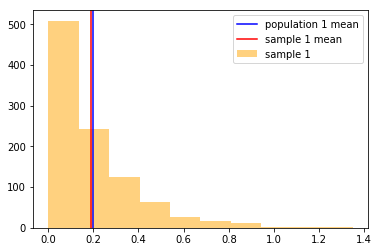

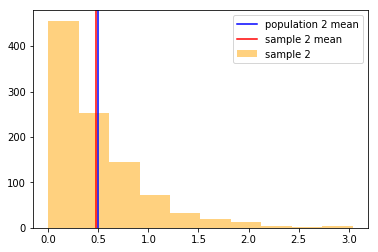

Population 1 Mean = 0.1968623391098914
Sample 1 Mean = 0.19028592381948148

Population 2 Mean = 0.4978479731426082
Sample 2 Mean = 0.47927178120971853


In [18]:
pop1 = np.random.exponential(0.2, 10000)
pop2 = np.random.exponential(0.5, 10000)

sample1 = np.random.choice(pop1, 1000, replace=True)
sample2 = np.random.choice(pop2, 1000, replace=True)

plt.axvline(x=pop1.mean(), color='blue', label='population 1 mean')
plt.axvline(x=sample1.mean(), color='red', label='sample 1 mean')
plt.hist(sample1, alpha=0.5, label='sample 1', color='orange') 
plt.legend(loc='upper right') 
plt.show()

plt.axvline(x=pop2.mean(), color='blue', label='population 2 mean')
plt.axvline(x=sample2.mean(), color='red', label='sample 2 mean')
plt.hist(sample2, alpha=0.5, label='sample 2', color='orange') 
plt.legend(loc='upper right') 
plt.show()

print(
    "Population 1 Mean = {}\n"
    "Sample 1 Mean = {}\n"
    "\n"
    "Population 2 Mean = {}\n"
    "Sample 2 Mean = {}". format(pop1.mean(), sample1.mean(), pop2.mean(), sample2.mean()))

The sample mean values are still close to the population mean values, with the sample size 1,000 and the population size 10,0000. On the other hand, these means don't have much significance as the distributions are not normal, and not even symmetric nor have a central tendency.